# Exploring MDS

Implementing MDS in python.

In [13]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.metrics.pairwise import euclidean_distances

Example 3D dataset:

In [14]:
X = np.array([[0, 0, 0], [0, 0, 1], [1, 1, 1], [0, 1, 0], [0, 1, 1]])

3D plot to illustrate the data.

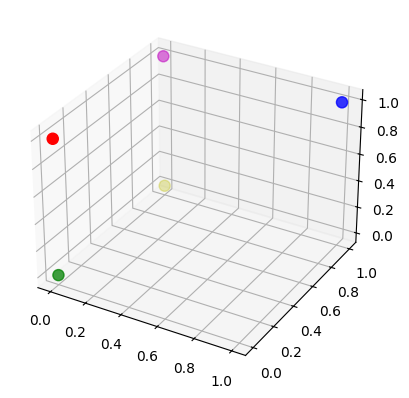

In [15]:
fig = plt.figure
ax = plt.axes(projection='3d')
plt.scatter(X[:, 0], X[:, 1], zs=X[:, 2], s=64, c=['g', 'r', 'b', 'y', 'm'])
plt.show()

Creating a two dimensional MDS structure with data output into an object 'X_transform'.

In [16]:
mds = MDS(random_state=0)
X_transform = mds.fit_transform(X)
print(X_transform)

[[ 0.72521687  0.52943352]
 [ 0.61640884 -0.48411805]
 [-0.9113603  -0.47905115]
 [-0.2190564   0.71505714]
 [-0.21120901 -0.28132146]]


Plotting the MDS representation of the data using the same colours as before.

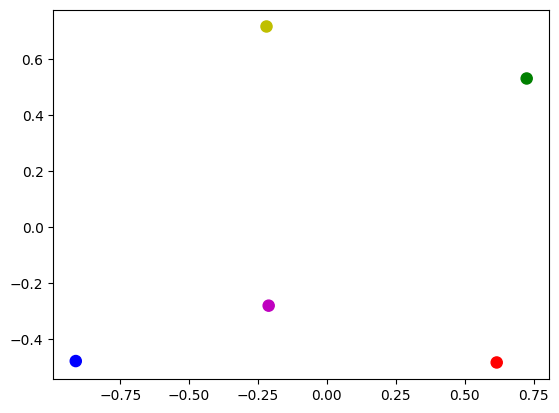

In [17]:
fig = plt.figure
ax = plt.axes()
plt.scatter(X_transform[:, 0], X_transform[:, 1], s=64, c=['g', 'r', 'b', 'y', 'm'])
plt.show()

Automating the classical MDS procedure to see how it compares to the implementation using the python libraries above.

In [18]:
from numpy.linalg import eig
dist_matrix = euclidean_distances(X)

D2 = dist_matrix * dist_matrix
#print(dist_matrix)
#print(D2)
J = np.identity(5) - np.ones(5)/5
B = -0.5 * J@D2@J
#print(B)

w, v = eig(B)
idx = w.argsort()[::-1]
w = w[idx]
v = v[:, idx]
Lambda = [[w[0]**0.5,0], [0, w[1]**0.5,]]
Q = np.mat([v[:, 0],v[:, 1]])
Output = Q.transpose()@Lambda

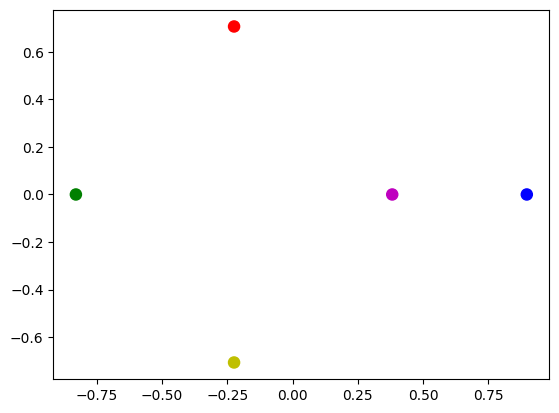

In [19]:
fig = plt.figure
ax = plt.axes()
Output = np.array(Output)
plt.scatter(Output[:, 0], Output[:, 1], s=64, c=['g', 'r', 'b', 'y', 'm'])
plt.show()

The data below downloads and splices a set of 64 by 64 pixel images of faces. There are 10 different pictures of each individual.

In [20]:
faces = dt.fetch_olivetti_faces()
X_faces = faces.data
y_faces = faces.target
ind = y_faces < 4
X_faces = X_faces[ind,:]
y_faces = y_faces[ind]

Creating a 2D MDS for the data with structure stored in facemds and data stored in facepts

In [21]:
facemds = MDS(random_state=0)
facepts = facemds.fit_transform(X_faces)

Plotting this on a graph shows how this simple implementation of MDS is able to keep similar faces close together in this 2D space. This could be coupled with a k-means clustering algorithm to make a very basic facial recognition programme.

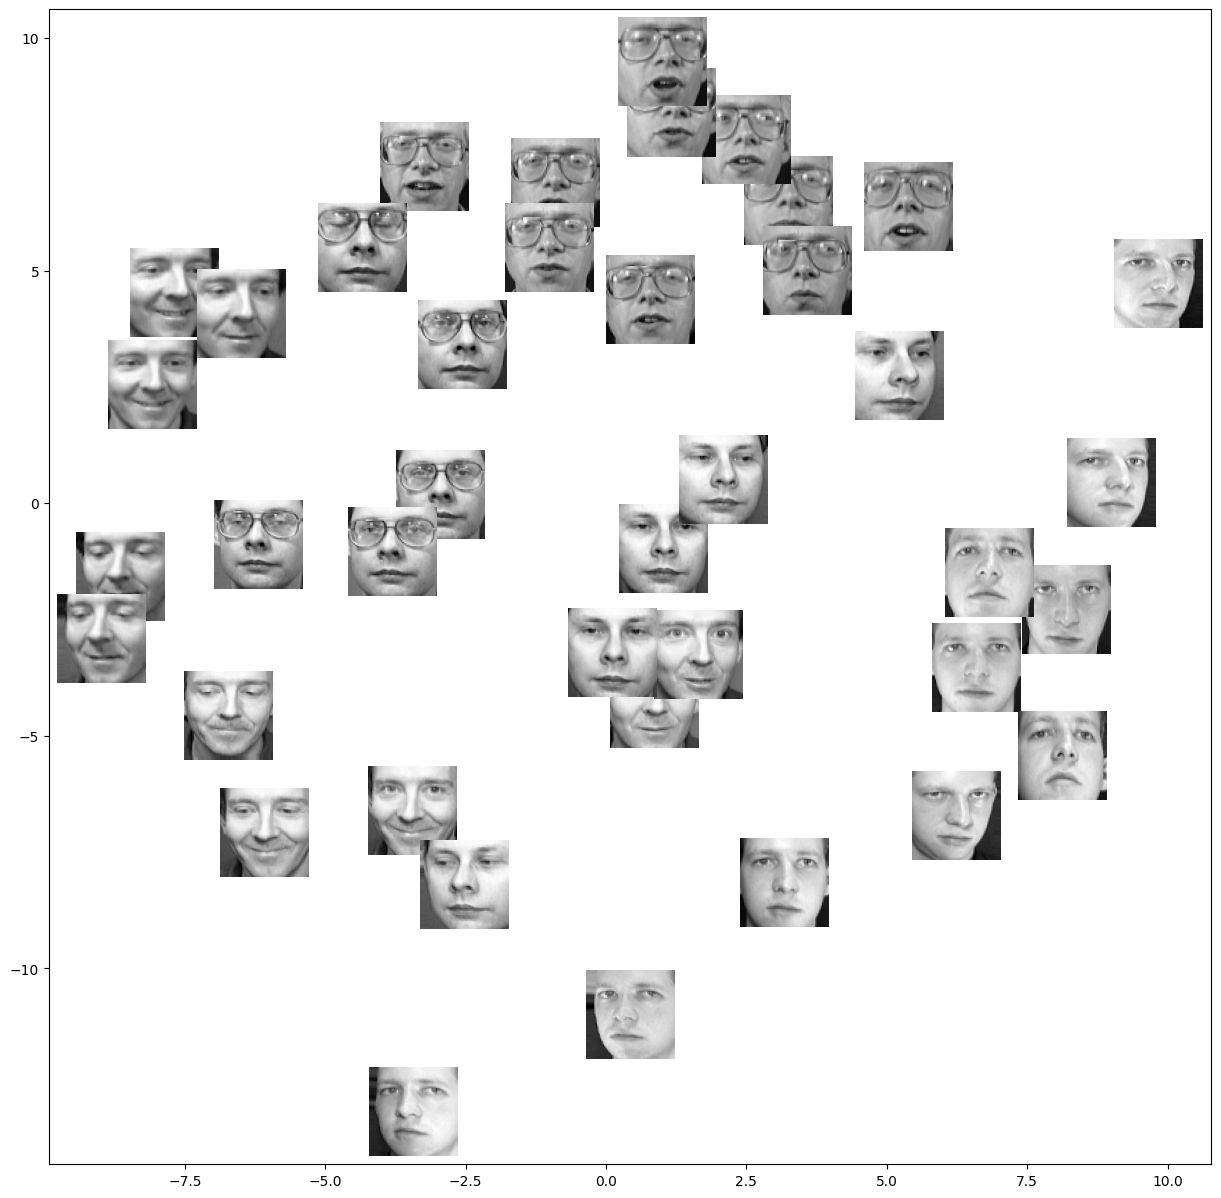

In [22]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes()
plt.scatter(facepts[:, 0],facepts[:, 1])
for x, ind in zip(X_faces, range(facepts.shape[0])):
    im = x.reshape(64, 64)
    imagebox = OffsetImage(im, zoom=1, cmap=plt.cm.gray)
    i = facepts[ind, 0]
    j = facepts[ind, 1]
    ab = AnnotationBbox(imagebox, (i,j), frameon=False)
    ax.add_artist(ab)
plt.show()
